<a href="https://colab.research.google.com/github/Sparrow0hawk/crime_sim_toolkit/blob/master/examples/crime_sim_poisson_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example notebook for using the crime_sim_toolkit

Follow these steps to load your own data into the crime_sim_toolkit for generating new crime data using the Poisson Sampler function.

## Notes on running
For this to run successfully follow these steps:


1.   Git clone the repo into the root dir
2.   Run pip install within the downloaded repo
3.   Reset the local runtime to allow for pip packages installed to work
4.   Then run python setup.py install on downloaded repo

The package should now be useable within the notebook.



In [1]:
%cd ~/

! git clone https://github.com/Sparrow0hawk/crime_sim_toolkit.git

/root
Cloning into 'crime_sim_toolkit'...
remote: Enumerating objects: 189, done.
remote: Counting objects: 100% (189/189), done.
remote: Compressing objects: 100% (127/127), done.
remote: Total 514 (delta 99), reused 138 (delta 61), pack-reused 325
Receiving objects: 100% (514/514), 57.03 MiB | 25.81 MiB/s, done.
Resolving deltas: 100% (282/282), done.


In [2]:
%cd ~/crime_sim_toolkit

!pip install -q -r requirements.txt

/root/crime_sim_toolkit
     |████████████████████████████████| 215kB 7.3MB/s 
     |████████████████████████████████| 92kB 19.2MB/s 
     |████████████████████████████████| 13.1MB 48.2MB/s 
     |████████████████████████████████| 20.4MB 11.0MB/s 
     |████████████████████████████████| 10.5MB 39.4MB/s 
     |████████████████████████████████| 235kB 43.5MB/s 
     |████████████████████████████████| 512kB 47.7MB/s 
     |████████████████████████████████| 61kB 21.3MB/s 
     |████████████████████████████████| 25.2MB 65.2MB/s 
     |████████████████████████████████| 153kB 40.8MB/s 
ERROR: kaggle 1.5.5 has requirement urllib3<1.25,>=1.21.1, but you'll have urllib3 1.25.3 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.25.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement requests~=2.21.0, but you'll have requests 2.22.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement coverage==3.7.1, but you'll have c

# RESTART RUNTIME

In [1]:
%cd ~/crime_sim_toolkit

!python setup.py -q install

/root/crime_sim_toolkit


## Loading data

Using data from a [custom dowload](https://data.police.uk/data/) from Police Data UK we can load that data, covert it to counts by crime_type by LSOA by psuedo Week/Day by passing the directory to the Poisson_sim function.

Sample data used here is included within the [github repository](https://github.com/Sparrow0hawk/crime_sim_toolkit/tree/master/sample_data) and covers January-June from 2017-2019.

In [2]:
import crime_sim_toolkit.poisson_sim as Poisson_sim


sim_week = Poisson_sim.Poisson_sim(
                               # because of the data passed these are the LA we want
                               LA_names=['Kirklees','Calderdale','Leeds','Bradford','Wakefield'], 
                               directory='/root/crime_sim_toolkit/sample_data',
                               # this can either be Day or Week
                               timeframe='Week')

Fetching count data from police reports.
Sit back and have a brew, this may take sometime.
 
Number of data files found:  18
Psuedo days allocated to all reports.
Week numbers allocated.


In [3]:
sim_week.data.head()

,Counts,Crime_type,LSOA_code,Mon,Week,Year
0,1,Anti-social behaviour,E01010568,1,1,2017
1,2,Anti-social behaviour,E01010569,1,4,2017
2,1,Anti-social behaviour,E01010569,1,2,2017
3,2,Anti-social behaviour,E01010571,1,4,2017
4,1,Anti-social behaviour,E01010572,1,2,2017


## Sampling new data

Based on the loaded data we can now create an out of bag sample and use the poisson sampler to generate crime reports based on historic reports to be compared to the out of bag sample.

In [4]:
test_data = sim_week.out_of_bag_prep(sim_week.data)

train_data = sim_week.oob_train_split(sim_week.data, test_data)


The passed data does not appear to have a full years (Jan-Dec) worth of data.
Defaulting to select out-of-bag sample for most recent year.


In [5]:
%%time

datat = sim_week.SimplePoission(train_data, test_data)

Beginning sampling.
Month: 1 Week: 1
Month: 1 Week: 2
Month: 1 Week: 3
Month: 1 Week: 4
Month: 1 Week: 5
Month: 2 Week: 5
Month: 2 Week: 6
Month: 2 Week: 7
Month: 2 Week: 8
Month: 2 Week: 9
Month: 3 Week: 9
Month: 3 Week: 10
Month: 3 Week: 11
Month: 3 Week: 12
Month: 3 Week: 13
Month: 4 Week: 14
Month: 4 Week: 15
Month: 4 Week: 16
Month: 4 Week: 17
Month: 4 Week: 18
Month: 5 Week: 18
Month: 5 Week: 19
Month: 5 Week: 20
Month: 5 Week: 21
Month: 5 Week: 22
Month: 6 Week: 22
Month: 6 Week: 23
Month: 6 Week: 24
Month: 6 Week: 25
Month: 6 Week: 26
CPU times: user 19min 19s, sys: 6.35 s, total: 19min 26s
Wall time: 19min 20s


## Model comparison

We can compare our model to the hold out test set using the error_Reporting function.

Root mean squared error of poisson sampler:  3.8
Mean absolute error:  2.7
Median absolute error:  2.0


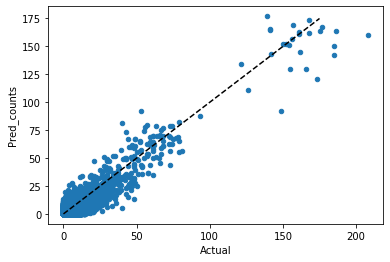

In [6]:
diff_table = sim_week.error_Reporting(test_data=test_data, simulated_data=datat)

In [7]:
datat.Counts.sum()

113444

In [8]:
test_data.Counts.sum()

161391

In [9]:
diff_table.head()

,Week,Pred_counts,Actual,Difference
LSOA_code,,,,
E01010568,1,3,1,2
E01010569,1,7,4,3
E01010570,1,0,5,5
E01010571,1,6,1,5
E01010572,1,0,2,2


## Using utils to get counts to reports

You can use utility functions within the toolkit to convert generated count data back into individual reports. And using the populate_offence function include a more specific crime description (randomly allocated from regional data).

In [0]:
from crime_sim_toolkit import utils

In [11]:
%%time

synth_counts = utils.counts_to_reports(datat)

CPU times: user 1min 47s, sys: 161 ms, total: 1min 47s
Wall time: 1min 48s


In [12]:
%%time
# generate additional crime descriptions

synth_counts_des = utils.populate_offence(synth_counts)

CPU times: user 9min 2s, sys: 378 ms, total: 9min 3s
Wall time: 9min 4s


In [13]:
synth_counts_des.head()

,Week,Mon,Crime_type,LSOA_code,UID,Police_force,Crime_description
0,1,1,Anti-social behaviour,E01010568,E010111A0,West Yorkshire,Anti-social behaviour
1,1,1,Anti-social behaviour,E01010568,E010111A1,West Yorkshire,Anti-social behaviour
2,1,1,Anti-social behaviour,E01010590,E010111A0,West Yorkshire,Anti-social behaviour
3,1,1,Anti-social behaviour,E01010590,E010111A1,West Yorkshire,Anti-social behaviour
4,1,1,Anti-social behaviour,E01010603,E010111A0,West Yorkshire,Anti-social behaviour


## Outputting from Colabs

Data produced can now be exported as a .csv for use in the agent-based model.

In [0]:
synth_counts_des.to_csv('synthetic_day_reports.csv')

In [0]:
from google.colab import files

files.download('synthetic_day_reports.csv')